In [3]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [4]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
X_train.shape

(35000, 32, 32, 3)

In [6]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [7]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)
#augmented_images = datagen.flow(X_train, Y_train, subset='training', batch_size=700)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')
#validation_data = datagen.flow(X_train, Y_train, subset='validation', batch_size=700)

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [8]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

In [9]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [10]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer:



"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the \nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer: \n\n\n\n'

*Sources - chatgpt, medium, youtube*

**Batch Normalization** is a technique used in deep learning to address the issue of **internal covariate shift** and improve the training stability and convergence of neural networks.
**Internal covariate shift** refers to the change in the distribution of the input data to each layer during training, which makes it harder for the subsequent layers to learn effectively.

The main idea behind Batch Normalization is to normalize the inputs of each layer by transforming them to have ***zero mean and variance =1***. This is done by computing the **mean and standard deviation** of the inputs within each mini-batch during training. The normalized inputs are then **scaled and shifted** using learnable parameters, allowing the model to learn the optimal scale and bias for each layer.

**Benefits**

1)**Improved training speed**: By normalizing the inputs, Batch Normalization reduces the internal covariate shift, which leads to faster convergence. It allows higher learning rates to be used without causing the network to diverge or get stuck in local optima.

2)**Improved generalization**: Batch Normalization acts as a form of regularization by adding noise to the inputs. This noise helps prevent overfitting and improves the model's ability to generalize to unseen data.

3)**Mitigation of vanishing/exploding gradients**: By normalizing the inputs, Batch Normalization helps mitigate the vanishing or exploding gradient problem that can occur in deep neural networks. It allows for more stable gradients throughout the network, leading to better weight updates and improved training.

4)**Independence from batch size**: Batch Normalization calculates the statistics within each mini-batch, making it independent of the batch size used during training. This property allows Batch Normalization to be effective even with smaller batch sizes.

In [11]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [12]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers


model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())






model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))







# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                        

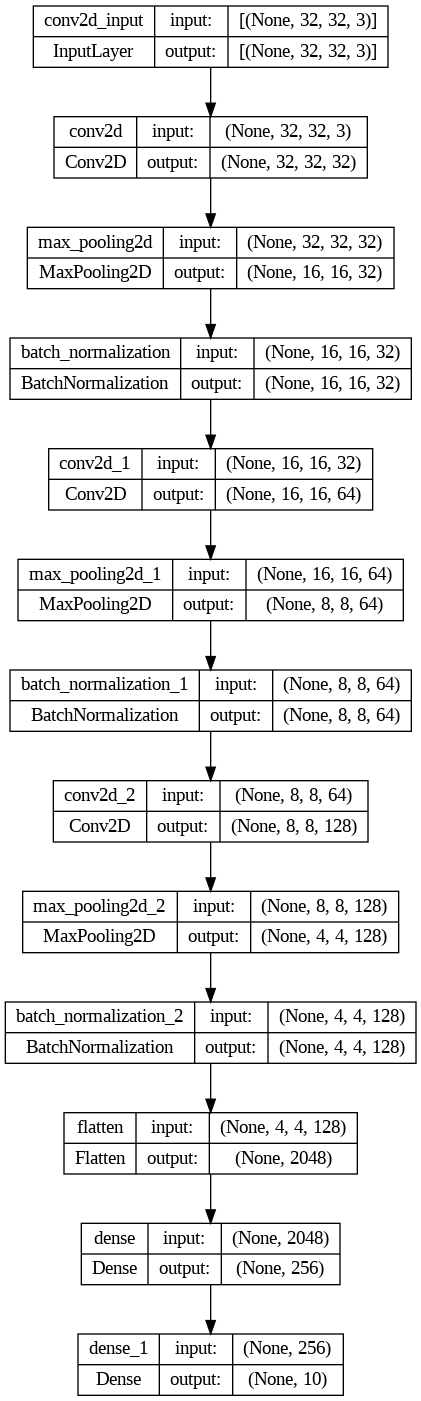

In [14]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

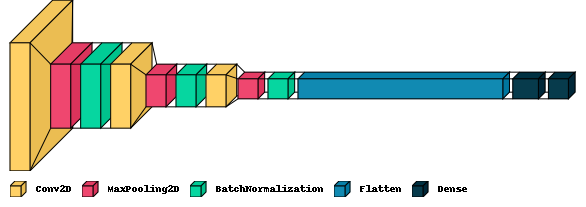

In [15]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [16]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0008),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [37]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 28s 25ms/step - loss: 0.9505 - accuracy: 0.6723 - val_loss: 0.9880 - val_accuracy: 0.6531
Epoch 2/10
1094/1094 [==============================] - 28s 25ms/step - loss: 0.9315 - accuracy: 0.6782 - val_loss: 0.9848 - val_accuracy: 0.6583
Epoch 3/10
1094/1094 [==============================] - 29s 26ms/step - loss: 0.9042 - accuracy: 0.6877 - val_loss: 0.9256 - val_accuracy: 0.6726
Epoch 4/10
1094/1094 [==============================] - 28s 25ms/step - loss: 0.8940 - accuracy: 0.6931 - val_loss: 1.0058 - val_accuracy: 0.6516
Epoch 5/10
1094/1094 [==============================] - 29s 26ms/step - loss: 0.8742 - accuracy: 0.6975 - val_loss: 0.8373 - val_accuracy: 0.7050
Epoch 6/10
1094/1094 [==============================] - 29s 27ms/step - loss: 0.8631 - accuracy: 0.7034 - val_loss: 0.9454 - val_accuracy: 0.6699
Epoch 7/10
1094/1094 [==============================] - 28s 25ms/step - loss: 0.8471 - accuracy: 0.7067 - val_loss: 1.0196 -

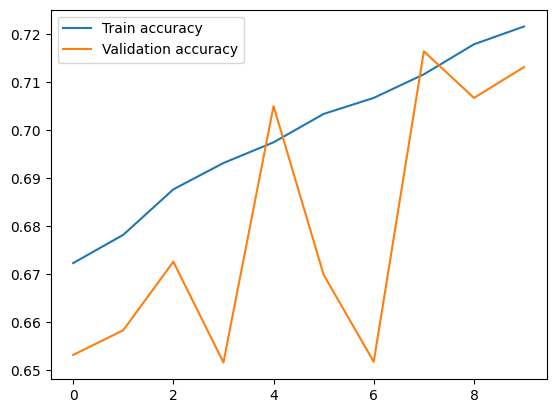

In [38]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [39]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 0.8859 - accuracy: 0.7081


[0.885910153388977, 0.708133339881897]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(24, 3, padding='same', activation='relu', input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(48, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(96, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(192, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(192, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))


model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [24]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0006),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [27]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 39s 31ms/step - loss: 1.9133 - accuracy: 0.2861 - val_loss: 1.6262 - val_accuracy: 0.3946
Epoch 2/10
1094/1094 [==============================] - 36s 33ms/step - loss: 1.5636 - accuracy: 0.4333 - val_loss: 1.3761 - val_accuracy: 0.5071
Epoch 3/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.4034 - accuracy: 0.4966 - val_loss: 1.2446 - val_accuracy: 0.5487
Epoch 4/10
1094/1094 [==============================] - 29s 26ms/step - loss: 1.2980 - accuracy: 0.5420 - val_loss: 1.1626 - val_accuracy: 0.5886
Epoch 5/10
1094/1094 [==============================] - 31s 29ms/step - loss: 1.2175 - accuracy: 0.5756 - val_loss: 1.1218 - val_accuracy: 0.5976
Epoch 6/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.1443 - accuracy: 0.6002 - val_loss: 1.0243 - val_accuracy: 0.6389
Epoch 7/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.0971 - accuracy: 0.6172 - val_loss: 0.9996 -

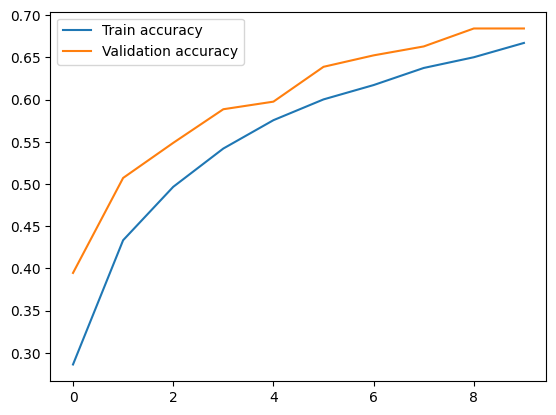

In [28]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [29]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 2s 4ms/step - loss: 0.8345 - accuracy: 0.7115


[0.8345486521720886, 0.7114666700363159]

NEXT MODEL

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(192, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))


model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [31]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [34]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 33s 27ms/step - loss: 1.6854 - accuracy: 0.3847 - val_loss: 1.6986 - val_accuracy: 0.4043
Epoch 2/10
1094/1094 [==============================] - 30s 28ms/step - loss: 1.3917 - accuracy: 0.5031 - val_loss: 1.3609 - val_accuracy: 0.5091
Epoch 3/10
1094/1094 [==============================] - 29s 26ms/step - loss: 1.2783 - accuracy: 0.5465 - val_loss: 1.2388 - val_accuracy: 0.5580
Epoch 4/10
1094/1094 [==============================] - 29s 26ms/step - loss: 1.2127 - accuracy: 0.5759 - val_loss: 1.2178 - val_accuracy: 0.5691
Epoch 5/10
1094/1094 [==============================] - 29s 27ms/step - loss: 1.1439 - accuracy: 0.5967 - val_loss: 1.1353 - val_accuracy: 0.6026
Epoch 6/10
1094/1094 [==============================] - 29s 26ms/step - loss: 1.0978 - accuracy: 0.6152 - val_loss: 1.1038 - val_accuracy: 0.6007
Epoch 7/10
1094/1094 [==============================] - 29s 26ms/step - loss: 1.0626 - accuracy: 0.6309 - val_loss: 1.0345 -

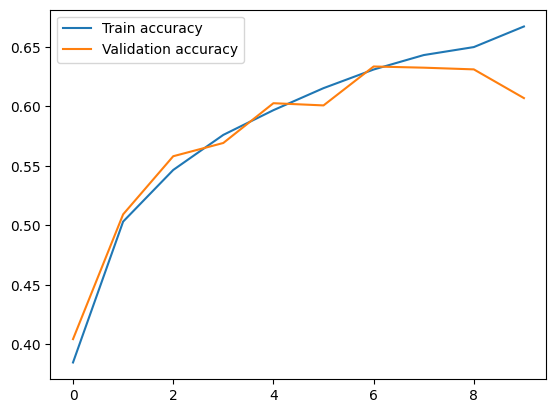

In [35]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [36]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 0.9436 - accuracy: 0.6775


[0.9436296224594116, 0.6774666905403137]

I tried some other models which were more or less just changing of values so I havent written them because I was just changing values in the earlier models.